# Robyn Budget Allocator Demo

This notebook demonstrates how to use the Python implementation of Robyn's budget allocator.
It shows how to:
1. Load and prepare data
2. Configure the allocator
3. Run optimization scenarios
4. Analyze and visualize results

## Step 1: Load Exported R Data

In [1]:
## Step 1: Setup and Import
import sys
import os
import pandas as pd
import numpy as np
from typing import Dict, Any, Union, List
import matplotlib.pyplot as plt

# Add Robyn to path
sys.path.append("/Users/yijuilee/robynpy_release_reviews/Robyn/python/src")

# Import necessary Robyn classes
from robyn.data.entities.mmmdata import MMMData
from robyn.modeling.entities.modeloutputs import ModelOutputs
from robyn.data.entities.hyperparameters import Hyperparameters
from robyn.allocator.entities.enums import OptimizationScenario, ConstrMode

from utils.data_mapper import load_data_from_json, import_input_collect, import_output_collect, import_output_models

2024-11-19 16:21:43,616 - robyn - INFO - Logging is set up to console only.
/Users/yijuilee/robynpy_release_reviews/robynvenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load data from JSON exported from R
raw_input_collect = load_data_from_json(
    "/Users/yijuilee/robynpy_release_reviews/Robyn/python/src/tutorials/data/Allocator_InputCollect.json"
)
raw_output_collect = load_data_from_json(
    "/Users/yijuilee/robynpy_release_reviews/Robyn/python/src/tutorials/data/Allocator_OutputCollect.json"
)
raw_output_models = load_data_from_json(
    "/Users/yijuilee/robynpy_release_reviews/Robyn/python/src/tutorials/data/Allocator_OutputModels.json"
)

# Convert R data to Python objects
r_input_collect = import_input_collect(raw_input_collect)
r_output_collect = import_output_collect(raw_output_collect)
python_model_outputs = import_output_models(raw_output_models)

# Extract individual components
mmm_data = r_input_collect["mmm_data"]
featurized_mmm_data = r_input_collect["featurized_mmm_data"]
holidays_data = r_input_collect["holidays_data"]
model_outputs = python_model_outputs
hyperparameters = r_input_collect["hyperparameters"]

Adjusted window_start to the closest date in the data: 2016-01-04 00:00:00
Adjusted window_end to the closest date in the data: 2018-12-31 00:00:00
Debug: R output data keys: ['trial1', 'trial2', 'trial3', 'trial4', 'trial5']
Data for trial1: Keys = ['resultCollect', 'hyperBoundNG', 'hyperBoundFixed']
Debug: resultCollect keys for trial1: ['resultHypParam', 'xDecompAgg', 'liftCalibration', 'decompSpendDist', 'iter', 'elapsed.min']
Debug: Sample resultHypParam for trial1: [{'facebook_S_alphas': 1.98202923325, 'facebook_S_gammas': 0.58424338159, 'facebook_S_thetas': 0.09072730547999999, 'newsletter_alphas': 1.7514167265, 'newsletter_gammas': 0.6585122811199999, 'newsletter_thetas': 0.22826231587, 'ooh_S_alphas': 1.9350874957500002, 'ooh_S_gammas': 0.80499137605, 'ooh_S_thetas': 0.26847073588000003, 'print_S_alphas': 1.3471347205000002, 'print_S_gammas': 0.6602001640299999, 'print_S_thetas': 0.34398200833000003, 'search_S_alphas': 1.835435262, 'search_S_gammas': 0.6915214566899999, 'searc

## Step 2: Set up Budget Allocator

Initialize the budget allocator with the selected model and data.

In [3]:
for solid in r_output_collect["pareto_result"].result_hyp_param["solID"]:
    print(f"Solution ID: {solid}")

Solution ID: 1_65_6
Solution ID: 1_150_3
Solution ID: 1_156_9
Solution ID: 1_160_3
Solution ID: 1_166_9
Solution ID: 1_208_4
Solution ID: 1_217_2
Solution ID: 2_85_3
Solution ID: 2_87_4
Solution ID: 2_93_9
Solution ID: 2_95_3
Solution ID: 2_97_3
Solution ID: 2_100_6
Solution ID: 2_101_9
Solution ID: 2_144_8
Solution ID: 2_170_8
Solution ID: 2_178_6
Solution ID: 2_197_8
Solution ID: 2_198_3
Solution ID: 2_198_9
Solution ID: 2_201_6
Solution ID: 2_204_9
Solution ID: 2_207_8
Solution ID: 2_208_2
Solution ID: 2_208_9
Solution ID: 2_214_8
Solution ID: 2_215_9
Solution ID: 2_217_6
Solution ID: 2_218_2
Solution ID: 2_218_3
Solution ID: 2_218_4
Solution ID: 2_220_1
Solution ID: 2_221_2
Solution ID: 2_221_5
Solution ID: 2_221_6
Solution ID: 3_66_5
Solution ID: 3_71_1
Solution ID: 3_74_4
Solution ID: 3_75_4
Solution ID: 3_77_7
Solution ID: 3_78_7
Solution ID: 3_78_9
Solution ID: 3_81_1
Solution ID: 3_82_3
Solution ID: 3_85_4
Solution ID: 3_91_1
Solution ID: 3_91_7
Solution ID: 3_95_4
Solution ID

In [4]:
from robyn.new_allocator.budget_allocator import BudgetAllocator

# Select a model from the results
select_model = "3_191_4"  # Example model ID
# Initialize budget allocator
allocator = BudgetAllocator(
    input_collect=mmm_data, output_collect=model_outputs, select_model=select_model, hyperparameters=hyperparameters
)

print(hyperparameters)

2024-11-19 16:21:52,078 - robyn.new_allocator.budget_allocator - INFO - Initialized BudgetAllocator with model 3_191_4


Hyperparameters(
  facebook_S_alphas=[0.5, 3]
  facebook_S_gammas=[0.3, 1]
  facebook_S_thetas=[0, 0.3]
  print_S_alphas=[0.5, 3]
  print_S_gammas=[0.3, 1]
  print_S_thetas=[0.1, 0.4]
  tv_S_alphas=[0.5, 3]
  tv_S_gammas=[0.3, 1]
  tv_S_thetas=[0.3, 0.8]
  search_S_alphas=[0.5, 3]
  search_S_gammas=[0.3, 1]
  search_S_thetas=[0, 0.3]
  ooh_S_alphas=[0.5, 3]
  ooh_S_gammas=[0.3, 1]
  ooh_S_thetas=[0.1, 0.4]
  newsletter_alphas=[0.5, 3]
  newsletter_gammas=[0.3, 1]
  newsletter_thetas=[0.1, 0.4]
  train_size=[0.5, 0.8]
)


## Step 3: Configure Allocation Settings

Set up constraints and parameters for optimization.

## Step 4: Run Different Optimization Scenarios

### Scenario 1: Default Max Response

In [5]:
# Similar to Example 1 in demo.R
result1 = allocator.run_allocation(
    scenario="max_response",
    channel_constraints_low=0.7,
    channel_constraints_up=[1.2, 1.5, 1.5, 1.5, 1.5],
    date_range="all",
)

# Print results
print(result1)

2024-11-19 16:21:52,083 - robyn.new_allocator.budget_allocator - INFO - Starting budget allocation with scenario: max_response
2024-11-19 16:21:52,086 - robyn.new_allocator.budget_allocator - INFO - Using historical total spend as budget: 14529098.511699999
/Users/yijuilee/robynpy_release_reviews/robynvenv/lib/python3.9/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
2024-11-19 16:21:52,109 - robyn.new_allocator.budget_allocator - INFO - Using historical total spend as budget: tv_S          3.087488e+06
ooh_S         8.989332e+06
print_S       7.755555e+05
facebook_S    4.462968e+05
search_S      1.230427e+06
dtype: float64
/Users/yijuilee/robynpy_release_reviews/robynvenv/lib/python3.9/site-packages/scipy/optimize/_slsqp_py.py:43


Running budget allocation
Scenario: max_response
Channel constraints: [0.7, [1.2, 1.5, 1.5, 1.5, 1.5]]

Preparing optimization inputs with spec:
OptimizationSpec(scenario='max_response', total_budget=None, date_range='all', channel_constraints_low=[0.7, 0.7, 0.7, 0.7, 0.7], channel_constraints_up=[1.2, 1.5, 1.5, 1.5, 1.5], channel_constraint_multiplier=3.0, max_eval=100000, constr_mode='eq', target_value=None)

Preparing optimization inputs with spec:
OptimizationSpec(scenario='max_response', total_budget=None, date_range='all', channel_constraints_low=[0.7, 0.7, 0.7, 0.7, 0.7], channel_constraints_up=[1.2, 1.5, 1.5, 1.5, 1.5], channel_constraint_multiplier=3.0, max_eval=100000, constr_mode='eq', target_value=None)

Date range indices: 0 to 207

Historical spend head:
         tv_S     ooh_S     print_S  facebook_S   search_S
0  22358.3467       0.0  12728.4889   7607.1329     0.0000
1  28613.4533       0.0      0.0000   1141.9525  4133.3333
2      0.0000  132278.4    453.8667   4256.

In [6]:
print(result1)

OptimizationResult(scenario=max_response, total_spend=69851.44, total_response=288574.86, response_lift=0.00%)


### Scenario 2: Max Response with Custom Settings

### Scenario 3: Target Efficiency
Optimize allocation based on target ROI/CPA.

### Scenario 4: Custom Target Efficiency

## Step 5: Visualize Results (One Pager)

Plot the optimization results and response curves.

In [7]:
# Before creating plots, add these debug lines
print("\nDataFrame columns:", result1.dt_optim_out.columns)
print("\nDataFrame head:\n", result1.dt_optim_out.head())


DataFrame columns: Index(['channels', 'initSpendUnit', 'optmSpendUnit', 'optmResponseUnit',
       'optmSpendShareUnit', 'optmResponseShareUnit', 'initSpendShare',
       'initResponseUnit', 'optmSpendUnitTotal', 'optmResponseUnitTotal',
       'initResponseUnitTotal', 'optmResponseUnitTotalLift', 'optmRoiUnit',
       'initRoiUnit'],
      dtype='object')

DataFrame head:
      channels  initSpendUnit  optmSpendUnit  optmResponseUnit  \
0        tv_S   14843.691217    1484.369122      55390.731600   
1       ooh_S   43217.941024   58239.368306      35164.173746   
2     print_S    3728.632264    9321.580660      24790.339705   
3  facebook_S    2145.657827     214.565783      32838.858838   
4    search_S    5915.512820     591.551282     140390.755686   

   optmSpendShareUnit  optmResponseShareUnit  initSpendShare  \
0            0.021250               0.191946        0.212504   
1            0.833761               0.121855        0.618712   
2            0.133449               0.0

In [8]:
date_range = (mmm_data.data[mmm_data.mmmdata_spec.date_var].min(), mmm_data.data[mmm_data.mmmdata_spec.date_var].max())
print(date_range)

(Timestamp('2015-11-23 00:00:00'), Timestamp('2019-11-11 00:00:00'))


Available columns: Index(['channels', 'initSpendUnit', 'optmSpendUnit', 'optmResponseUnit',
       'optmSpendShareUnit', 'optmResponseShareUnit', 'initSpendShare',
       'initResponseUnit', 'optmSpendUnitTotal', 'optmResponseUnitTotal',
       'initResponseUnitTotal', 'optmResponseUnitTotalLift', 'optmRoiUnit',
       'initRoiUnit'],
      dtype='object')

Preparing plot data with available columns: Index(['channels', 'initSpendUnit', 'optmSpendUnit', 'optmResponseUnit',
       'optmSpendShareUnit', 'optmResponseShareUnit', 'initSpendShare',
       'initResponseUnit', 'optmSpendUnitTotal', 'optmResponseUnitTotal',
       'initResponseUnitTotal', 'optmResponseUnitTotalLift', 'optmRoiUnit',
       'initRoiUnit'],
      dtype='object')

Processing channel: tv_S
Current spend: 14843.69121730769
Optimal spend: 1484.369121730899

Calculating response for tv_S
Input spend: [0.]
Parameters: coef=55390.99996431836, alpha=1.281954898, gamma=0.4641971387
Response: [55390.6256663]

Calculating re

ValueError: The palette dictionary is missing keys: {'Initial', 'Bounded'}

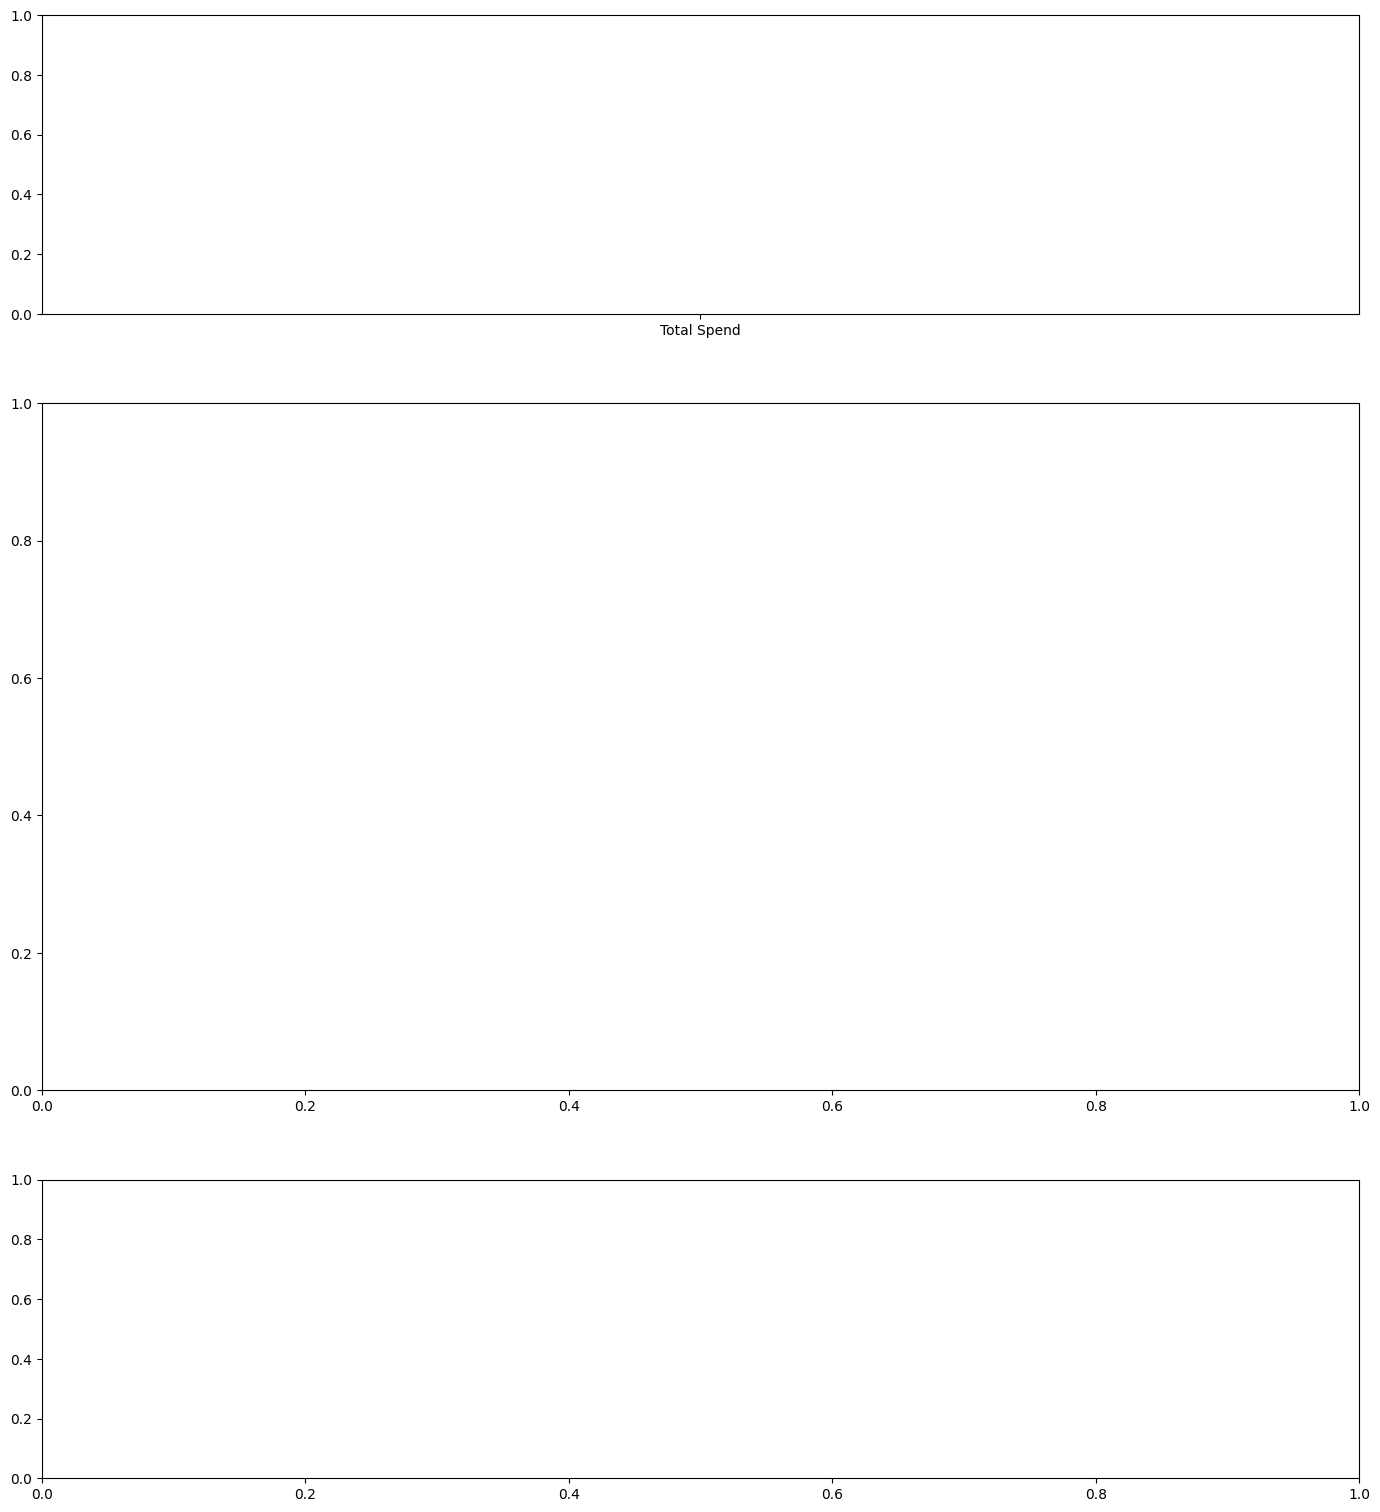

In [12]:
from robyn.new_allocator.allocation_plotter import AllocationPlotter
from robyn.new_allocator.optimization.objective_function import ObjectiveFunction
from robyn.data.entities.mmmdata import MMMData

# Create plotter
plotter = AllocationPlotter()

# Print available columns
print("Available columns:", result1.dt_optim_out.columns)

# Prepare response curves data
plot_data = plotter.prepare_plot_data(
    channels=allocator.paid_media_vars,
    dt_optimout=result1.dt_optim_out,
    objective_function=allocator.objective_function,
)

# Create plots
fig = plotter.create_onepager(
    dt_optimout=result1.dt_optim_out,
    plot_data=plot_data,
    scenario=result1.scenario,
    model_id="3_191_4",
    errors="R-squared: 0.85 | NRMSE: 0.15 | DECOMP.RSSD: 0.25",  # Add your actual metrics
)

plt.show()